# 决策树模型

首先读取数据，引入我们需要的包，并划分测试集和训练集

In [1]:
import pandas as pd

data = pd.read_csv('Advertising.csv')
data.head()
import seaborn as sns
import matplotlib.pyplot as plt
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
print X.head()

y = data['Sales']
print y.head()

from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64
(150, 3)
(150,)
(50, 3)
(50,)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


初始化决策树模型并进行训练

In [2]:
from sklearn import tree
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

使用训练好的模型对测试集进行预测，并输出预测数据

In [4]:
y_pred = dt.predict(X_test)
print y_pred
print type(y_pred)

[ 24.7  16.6   9.6  13.2  17.4  24.4  17.1  14.4  10.9  17.   15.2  11.3
  17.   14.7  13.4  18.5  13.2  12.3   4.8  18.9  10.6  12.6   7.   12.4
  13.2  14.7  10.1  20.2  18.   15.7  21.8  11.7  18.   12.8  20.2  14.9
  12.   11.2  21.8   6.6   5.9   9.6   6.6  19.6   6.6  15.6  13.6  21.7
  21.8  20.1]
<type 'numpy.ndarray'>


计算预测误差

In [5]:
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print "RMSE by hand:",sum_erro

RMSE by hand: 1.10878311675


画图显示出来

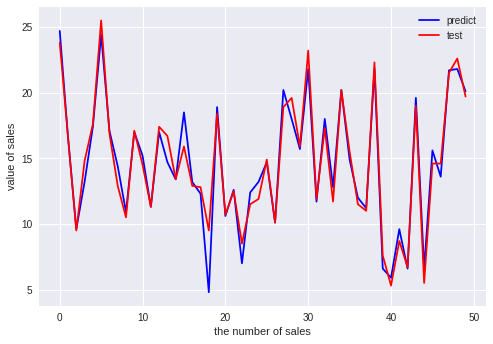

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()